In [1]:
import torch
import numpy as np
import helper_functions as h

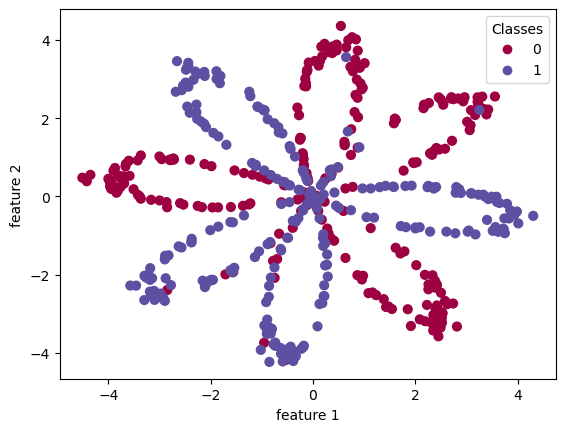

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=4)
h.plot_scatter(X_np, Y_np)

In [3]:
X = torch.tensor(X_np, dtype=torch.float32)   # shape=(2,500)=(d,m)
Y = torch.tensor(Y_np, dtype=torch.float32)   # shape=(1,500)=(1,m)

# Theory Hidden Layer Neural Network

**Data used**:
       
<table style="width:50%">
  <tr>
    <td>m (# of samples)</td>
    <td> 500 </td> 
  </tr>
  <tr>
    <td>d (# of features)</td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td> shape of X </td>
    <td> (d,m)=(2, 500) </td> 
  </tr>
  <tr>
    <td>shape of Y </td>
    <td>(1,m)=(1, 500) </td> 
  </tr>
  
</table>

## Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2 & \dots & \boldsymbol x^m \end{bmatrix}  $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,m)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2 & \dots & y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,m)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} \\ \bold {w_2}  \\ \vdots \\ \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} ---\boldsymbol{\omega_1}^T--- \\ ---\boldsymbol{\omega_2}^T--- \\ \vdots \\ ---\boldsymbol{\omega_{n_l}}^T--- \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1, n_{l-1})}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l, n_{l-1})}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

$ \boldsymbol{Z^{[l]}} = \boldsymbol{W^{[l]} A^{[l-1]} +b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(n_l,m)=(n_l,n_{l-1})\times(n_{l-1},m)} $
<br>
$ \boldsymbol{Z^{[l]}} = \begin{bmatrix} z^1 & z^2 & \dots & z^m \\
& \boldsymbol{z^{[l]}_{2}} \\ & \boldsymbol{z^{[l]}_{3}} \\ & \vdots \\ & \boldsymbol{z^{[l]}_{n_l}} \end{bmatrix} $

**Data**
<br>
$
\boldsymbol {X^{[0]}} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(n_x,m)=(d,m)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[2]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(n_y,m)=(1,m)} \color{default}
\\
\boldsymbol {W^{[1]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_h,n_x)=(n_h,d)} \color{default}
\\
\boldsymbol {W^{[2]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_y,n_h)=(1,n_h)} \color{default}
\\
\boldsymbol {b^{[1]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_h,1)} \color{default}
\\
\boldsymbol {b^{[2]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_y,1)=(1,1)} \color{default}
$

**Epoch**
<br>
$ \begin{rcases}
% \boldsymbol {Z^{[1]}} = \boldsymbol{W^{[1]}X} + \boldsymbol{b^{[1]}} 
% \qquad \qquad \qquad
% \color{purple}{shape: \qquad}\color{blue}{(n_h,m)=(n_h,d)\times(d,m)} \\
% or\\
\boldsymbol {Z^{[1]}} = \boldsymbol{W^{[1]}A^{[0]}} + \boldsymbol{b^{[1]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_h,m)=(n_h,n_x)\times(n_x,m)} \\
\displaystyle 
\boldsymbol {A^{[1]}} = g^{[1]}(\boldsymbol {Z^{[1]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(n_h,m)} 
\\
\boldsymbol {Z^{[2]}} = \boldsymbol{W^{[2]}A^{[1]}} + \boldsymbol{b^{[2]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_y,m)=(n_y,n_h)\times(n_h,m)} \\
\displaystyle 
\boldsymbol {A^{[2]}} = g^{[2]}(\boldsymbol {Z^{[2]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(n_y,m)}
\end{rcases} 
\color{green} \text{forward propagation} $
<br>
<br>
$ \displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold Y\ ln(\boldsymbol{A^{[2]}})+(1-\bold Y)\ ln(1-\boldsymbol{A^{[2]}})\} 
\qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{dZ^{[2]}} = \boldsymbol{A^{[2]}} - \bold{Y} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,m)} \\
\displaystyle 
\boldsymbol{dW^{[2]}}  = \frac{1}{m} \boldsymbol{dZ^{[2]}} \ \boldsymbol{A^{[1]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_y,n_h)=(n_y,m) \times (m,n_h)} \\
\displaystyle 
\boldsymbol{db^{[2]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[2]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \qquad \qquad
\\
\\
\boldsymbol{dZ^{[1]}} = \boldsymbol{W^{[2]}}^T \boldsymbol{dZ^{[2]}} * g'^{[1]}(\boldsymbol{Z^{[1]}})
\qquad \color{purple}{shape: } \ \color{blue}{(n_h,m)=(n_h,n_y) \times (n_y,m)} \\
\displaystyle 
\boldsymbol{dW^{[1]}}  = \frac{1}{m} \boldsymbol{dZ^{[1]}} \ \boldsymbol{A^{[0]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_h,n_x)=(n_h,m) \times (m,n_x)} \\
\displaystyle 
\boldsymbol{db^{[1]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[1]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_h,1)} \qquad \qquad
\end{rcases}
\color{green} \text{gradient descent} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{W^{[1]}} = \boldsymbol{W^{[1]}}-\alpha \ \boldsymbol{dW^{[1]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,n_x)} \\
\boldsymbol{b^{[1]}} = \boldsymbol{b^{[1]}} - \alpha \ \boldsymbol{db^{[1]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,1)} \\
\boldsymbol{W^{[2]}} = \boldsymbol{W^{[2]}}-\alpha \ \boldsymbol{dW^{[2]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,n_h)} \\
\boldsymbol{b^{[2]}} = \boldsymbol{b^{[2]}} - \alpha \ \boldsymbol{db^{[2]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \qquad
\end{rcases}
\color{green} \text{Update Parameters after epoch} $

To compute $\boldsymbol{dZ^{[1]}}$, you'll need to compute $g'^{[1]}(\boldsymbol{Z^{[1]}})$. 
<br>
Since $g^{[1]}(.)$ is the **tanh** activation function, if $a = g^{[1]}(.)$ then $g^{[1]'}(.) = 1-a^2$. 
<br>
So you can compute $g^{[1]'}(\boldsymbol{Z^{[1]}})$ using **(1 - np.power($\boldsymbol{A^{[1]}}$, 2))**.

# Custom z, gradient update, accuracy

In [4]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|np$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 10000
learning_rate = 0.5
n_h = 4     # number of hidden units

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## layer_sizes
n_x = X.shape[0] # size of input layer
n_h = n_h        # size of hidden layer
n_y = Y.shape[0] # size of output layer

## Initialize parameters
np.random.seed(3)
W1 = torch.tensor(np.random.randn(n_h, n_x) * 0.01, requires_grad=True, dtype=torch.float32)
b1 = torch.zeros((n_h, 1), requires_grad=True)
W2 = torch.tensor(np.random.randn(n_y, n_h) * 0.01, requires_grad=True, dtype=torch.float32)
b2 = torch.zeros((n_y, 1), requires_grad=True)

## epochs loop
for i in range (num_epochs):
    ## Forward propagation(FROM X TO A2)
    Z1 = torch.mm(W1,X) + b1        # shape(n_h,m) = (n_h,d)(d,m) + (n_h,1)
    A1 = torch.tanh(Z1)             # shape(n_h,m)
    Z2 = torch.matmul(W2,A1) + b2   # shape(n_y,m) = (n_y,n_h)(n_h,m) + (n_y,1)
    A2 = 1/(1 + torch.exp(-Z2))     # shape(n_y,m)
    Y_pred = A2
    
    # cost = torch.nn.functional.binary_cross_entropy_with_logits(Z2, Y, reduction="mean")
    cost = torch.nn.functional.binary_cross_entropy(Y_pred, Y, reduction="mean")

    ## backward pass
    cost.backward()

    ## updata parameters
    W1.data = W1.data - learning_rate * W1.grad.data
    b1.data = b1.data - learning_rate * b1.grad.data
    W2.data = W2.data - learning_rate * W2.grad.data
    b2.data = b2.data - learning_rate * b2.grad.data
    
    ## zero the gradients before running the backward pass
    W1.grad.data.zero_()
    b1.grad.data.zero_()
    W2.grad.data.zero_()
    b2.grad.data.zero_()

    ## Record the costs
    if i % 100 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32
        acc = torch.mean( (Y_pred_out == Y).type(torch.float32) )
        train_acc.append(acc.item()*100)
        ## Print the cost every 100 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
Z1 = torch.mm(W1,X) + b1        # shape(n_h,m) = (n_h,d)(d,m) + (n_h,1); float32
A1 = torch.tanh(Z1)             # shape(n_h,m); float32
Z2 = torch.matmul(W2,A1) + b2   # shape(n_y,m) = (n_y,n_h)(n_h,m) + (n_y,1); float32
Y_pred = 1/(1 + torch.exp(-Z2)) # shape(n_y,m); float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32

## Print train/test Errors
if print_cost:
    acc = torch.mean( (Y_pred_out == Y).type(torch.float32) )
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931667923927307
Cost in epochs 101, 0.5786970257759094
Cost in epochs 201, 0.5548126101493835
Cost in epochs 301, 0.32243046164512634
Cost in epochs 401, 0.26847973465919495
Cost in epochs 501, 0.2509850859642029
Cost in epochs 601, 0.2420123815536499
Cost in epochs 701, 0.2364005446434021
Cost in epochs 801, 0.23248527944087982
Cost in epochs 901, 0.2295558601617813
Cost in epochs 1001, 0.22725282609462738
Cost in epochs 1101, 0.22537286579608917
Cost in epochs 1201, 0.22379131615161896
Cost in epochs 1301, 0.22242769598960876
Cost in epochs 1401, 0.22122734785079956
Cost in epochs 1501, 0.22015228867530823
Cost in epochs 1601, 0.21917521953582764
Cost in epochs 1701, 0.21827633678913116
Cost in epochs 1801, 0.21744069457054138
Cost in epochs 1901, 0.21665705740451813
Cost in epochs 2001, 0.21591675281524658
Cost in epochs 2101, 0.21521298587322235
Cost in epochs 2201, 0.21454040706157684
Cost in epochs 2301, 0.21389473974704742
Cost in epochs 2401, 0.213272616267

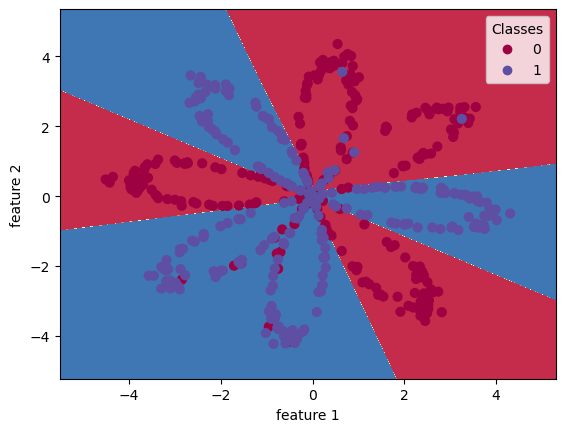

In [5]:
h.plot_1hidden_layer_nn_decision_boundary(W1.detach().numpy(), b1.detach().numpy(), W2.detach().numpy(), b2.detach().numpy(), X.numpy(), Y.numpy())